In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
alpha = 3 # CHANGE TO 4
beta = 0.002
delta = 0.0006
gamma = 0.5

def lotka_volterra(x):
    x_val, y_val = x
    dx = alpha * x_val - beta * x_val * y_val
    dy = delta * x_val * y_val - gamma * y_val
    return np.array([dx, dy])

In [114]:
def rk4(x_0, t_n, f, h):
    steps = int(t_n / h)
    x = np.linspace(0, 100, steps)
    y = np.linspace(0, 100, steps)
    u_i = x_0
    i = 0
    for i in range(steps):
        k1 = h * f(u_i)
        k2 = h * f(u_i + 0.5 * k1)
        k3 = h * f(u_i + 0.5 * k2)
        k4 = h * f(u_i + k3)
        
        u_n = u_i + (1 / 6) * (k1 + k2 + k3 + k4)
        
        x[i] = u_n[0]
        y[i] = u_n[1]
        
        u_i = u_n
    return (x, y)

In [116]:
tn = 10
h = 0.01

trajectories = []
for i in range(1, 11):
    for j in range(1, 11):
        x0 = [200 * i, 200 * j]
        traj = rk4(x0, tn, lotka_volterra, h)
        trajectories.append(traj)

# Вывод сообщения о завершении
print(f"Рассчитано {len(trajectories)} траекторий.")

Рассчитано 100 траекторий.


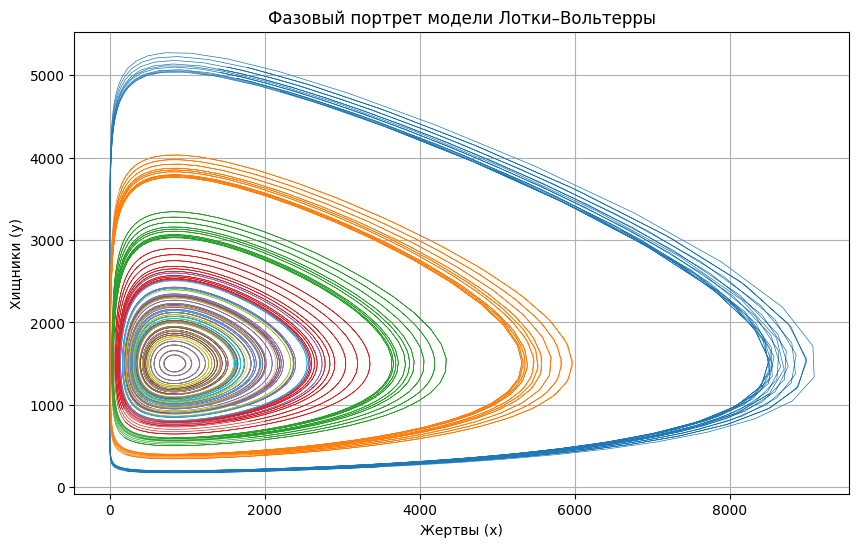

In [100]:
plt.figure(figsize=(10, 6))
for traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1], linewidth=0.5)
plt.xlabel("Жертвы (x)")
plt.ylabel("Хищники (y)")
plt.title("Фазовый портрет модели Лотки–Вольтерры")
plt.grid()
plt.show()

[[ 800.         1000.        ]
 [ 884.16835195 1000.48359613]
 [ 976.58698899 1006.28540832]
 ...
 [ 292.94702377 1340.60795655]
 [ 303.73143041 1298.23933034]
 [ 317.52128115 1258.13574948]]


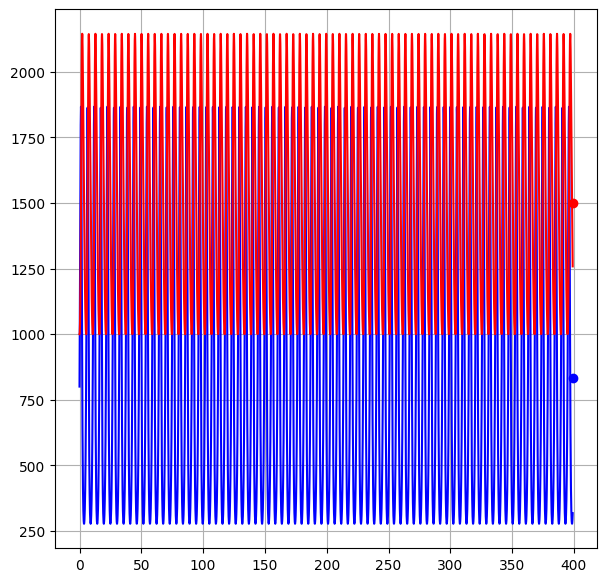

In [103]:
x_0 = np.array((800, 1000))
c = rk4(x_0, 400, lotka_volterra, 0.1)
print(c)
t = np.linspace(0, 399, 4000)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
axes.plot(t, c[:, 0], color='blue')
axes.plot(t, c[:, 1], color='red')
axes.plot(399, 833.33, "o", color="blue")
axes.plot(399, 1500, "o", color="red")
axes.grid()